In [96]:
import os
import pandas as pd
import statistics as stat
files = os.listdir("S0110")
files
names = [22.5,30,40,50,60,70,90,110,130,150,170]
nums = [22.64388265, 30.39151613, 40.25746774, 50.07306452, 59.86404301, 69.66849462, 89.12866129, 108.618957, 127.8504355, 147.3812742, 167.2023226]
files_new = []
for t in names:
    files_new.append(str(t) + ".xls")
files_new
avg1 = []
avg2 = []
avg_diff = []
for f in files_new:
    data = pd.read_excel("S0110/" + f)
    list1 =(list(data.iloc[:,1]))
    list2 = list(data.iloc[:,2])
    avg1.append(list1[-1])
    avg2.append(list2[-1])
    avg_diff.append(list2[-1]-list1[-1])

In [97]:
print(avg1)
print(avg2)
print(avg_diff)
#Part 2 for second column
constant = stat.mean(avg_diff)
constant

[1512.3027166666668, 1512.383, 1512.4834166666667, 1512.5855454545454, 1512.6919499999997, 1512.8087166666667, 1513.0183833333333, 1513.2270333333336, 1513.4532833333333, 1513.6892166666664, 1513.9352666666666]
[1513.4593833333336, 1513.5382666666665, 1513.6402333333335, 1513.7415181818185, 1513.8484166666665, 1513.9650333333332, 1514.17415, 1514.382816666667, 1514.6092333333333, 1514.8467666666668, 1515.0950166666669]
[1.1566666666667516, 1.1552666666664209, 1.1568166666668276, 1.155972727273138, 1.1564666666668018, 1.1563166666664983, 1.15576666666675, 1.1557833333333747, 1.1559500000000753, 1.1575500000003558, 1.1597500000002583]


1.1565732782370228

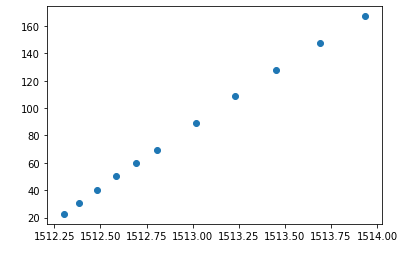

In [98]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(avg1,nums)
plt.xlabel("wavelength").set_color('white')
plt.ylabel("temperature").set_color('white')

In [99]:
#data for polynomial analysis regressions until 4th polynomial
#also calculates error
regression_data = []
fit_coef = []
error_list = []
for i in range(4):
    z = np.polyfit(x=avg1,y=nums,deg=i+1)
    p = np.poly1d(z)
    print(z)
    fit_coef.append(z)
    
    predicted_temp = p(avg1)
    counter = 0
    list_placer = []
    for t in predicted_temp:
        list_placer.append(t-nums[counter])
        counter+=1
    error_list.append(list_placer)
    regression_data.append(predicted_temp)

[ 8.89496061e+01 -1.34494339e+05]
[-5.27139145e+00  1.60411338e+04 -1.22030416e+07]
[-1.24902436e+00  5.66444592e+03 -8.56283933e+06  4.31471373e+09]
[-4.12314967e-04  1.24632175e+00  1.22208984e+00 -2.85049839e+06
  2.15400733e+09]


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
print(regression_data)
fit_coef

[array([ 24.39236015,  31.53353102,  40.46555396,  49.54986941,
        59.01451181,  69.40086081,  88.05062822, 106.60996352,
       126.73481189, 147.72098894, 169.60703951]), array([ 22.65975179,  30.43369565,  40.06152649,  49.74447095,
        59.71583841,  70.5208925 ,  89.56170279, 108.05008844,
       127.57931793, 147.36956805, 167.38326627]), array([ 22.84236813,  30.48989105,  40.00827217,  49.62808228,
        59.57679462,  70.39704132,  89.53333092, 108.14537239,
       127.76175499, 147.49951172, 167.19762802]), array([ 22.84237957,  30.48991108,  40.00829172,  49.62809372,
        59.57679415,  70.3970294 ,  89.53331327, 108.14537334,
       127.76179314, 147.49956512, 167.19759464])]


[array([ 8.89496061e+01, -1.34494339e+05]),
 array([-5.27139145e+00,  1.60411338e+04, -1.22030416e+07]),
 array([-1.24902436e+00,  5.66444592e+03, -8.56283933e+06,  4.31471373e+09]),
 array([-4.12314967e-04,  1.24632175e+00,  1.22208984e+00, -2.85049839e+06,
         2.15400733e+09])]

In [101]:
#List of all data error
error_list

[[1.7484774995334895,
  1.1420148923163111,
  0.20808622367329832,
  -0.5231951076474388,
  -0.8495311970269341,
  -0.26763380661186886,
  -1.0780330737613042,
  -2.008993480326666,
  -1.115623610410239,
  0.33971474481313635,
  2.4047169146962233],
 [0.015869143369652505,
  0.04217951972817957,
  -0.19594124776195798,
  -0.328593573509238,
  -0.14820460376502353,
  0.8523978846026665,
  0.433041503464068,
  -0.5688685608632511,
  -0.27111757263946856,
  -0.011706153817613085,
  0.1809436664353825],
 [0.198485475915529,
  0.09837492224609434,
  -0.2491955689794949,
  -0.44498224460937763,
  -0.2872483856713899,
  0.7285467008007771,
  0.40466962735840184,
  -0.47358460925292434,
  -0.08868051037597979,
  0.11823751874999289,
  -0.0046945787597678645],
 [0.19849692000732588,
  0.09839494940673887,
  -0.24917601865600858,
  -0.44497080051758076,
  -0.2872488625085481,
  0.728534779871822,
  0.4046519843835483,
  -0.47358365557860793,
  -0.08864236340332354,
  0.11829092451171164,
  -0.00

In [102]:
#compute for max error and average error
import math as m
max_list = []
mean_list = []
for i in error_list:
    max = i[0]
    mean = stat.mean(i)
    for t in i:
        if abs(t) > max:
            max = t
    max_list.append(max)
    mean_list.append(mean)

In [103]:
print(max_list)
print(mean_list)

[2.4047169146962233, 0.8523978846026665, 0.7285467008007771, 0.728534779871822]
[-6.836293147733323e-11, 4.766724388942252e-10, -6.5138707399305735e-06, 1.8091051123421535e-06]


In [106]:
#Part 3 for subtracting column equation with constant and plugging into equation
x_data = []
final_data = []
for o in avg2:
    b = o-constant
    b
    z = np.polyfit(x=avg1,y=nums,deg=2)
    p = np.poly1d(z)
    p
    print(p(b))
    final_data.append( p(b))
final_data




22.668834200128913
30.30771864578128
40.08473313972354
49.68785345181823
59.70590737462044
70.49730444513261
89.48933869041502
107.98095731623471
127.52625970169902
147.45027636364102
167.63748721405864


[22.668834200128913,
 30.30771864578128,
 40.08473313972354,
 49.68785345181823,
 59.70590737462044,
 70.49730444513261,
 89.48933869041502,
 107.98095731623471,
 127.52625970169902,
 147.45027636364102,
 167.63748721405864]